EXPLORACION DATOS IRIS 

In [ ]:
#LIBRERIAS
#numericos y datos
import pandas as pd
import numpy as np
#graficos
import matplotlib.pyplot as plt
import seaborn as sns #estilos
# machine y deep learning 
import tensorflow as tf
import keras
import sklearn

In [ ]:
#leeer dataset
dataset= pd.read_csv("/content/IRIS.csv")
dataset
#para verificar la dimension se usa dataset.shape
#si solo necesita ver el encabezado lo hace con dataset.head()
#para observar la parte inferior dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#colocar nombres a las columnas
dataset=dataset.rename(columns={"species":"target","sepal_length":"largo_sepalo","sepal_width":"ancho_sepalo","petal_length":"largo_petalo","petal_width":"ancho_petalo"})
dataset

,largo_sepalo,ancho_sepalo,largo_petalo,ancho_petalo,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
dato=dataset["largo_sepalo"][47]
print(dato)

4.6


In [ ]:
suma= dataset['largo_petalo'][1]+dataset["ancho_sepalo"][1]
print(suma)

4.4


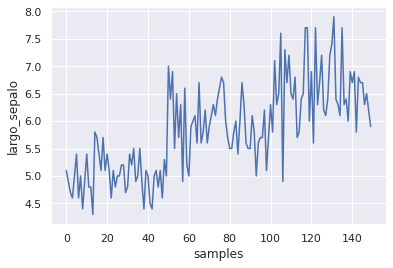

In [ ]:

#garfica
%matplotlib inline 

#construccion de la grafica
plt.plot(dataset["largo_sepalo"])
plt.ylabel("largo_sepalo")#titulo del eje y
plt.xlabel("samples")#titulo del eje x
plt.show()


no olvidar sacar el diagrama de barras

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  


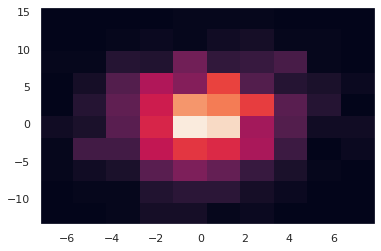

In [ ]:
fig, ax = plt.subplots()
x, y = np.random.multivariate_normal(mean=[0.1, 0.8], cov=[[6.0, 0.9], [0.4, 20]], size=1000).T
ax.hist2d(x, y)
plt.show()

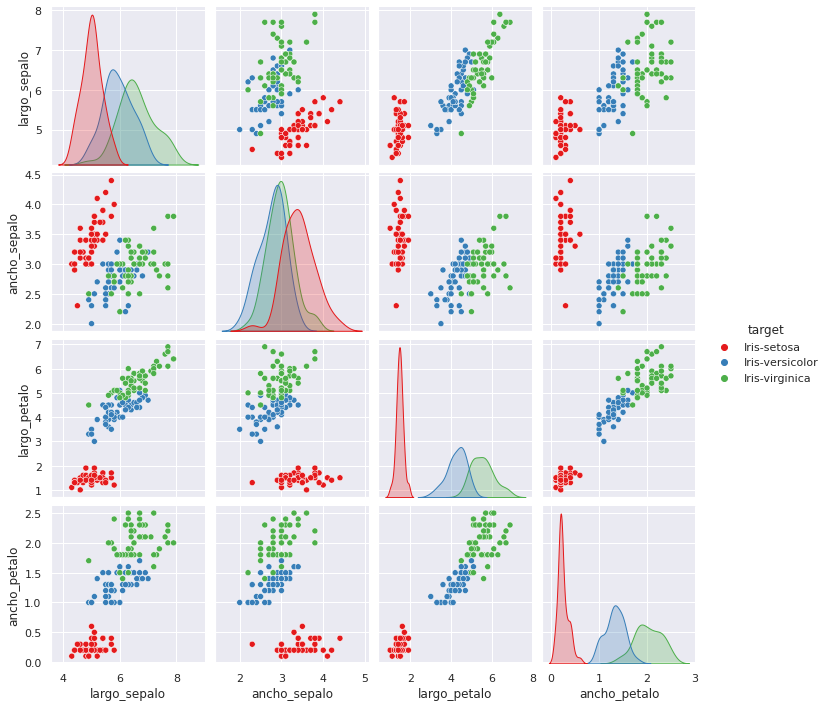

In [ ]:
%matplotlib inline
#garfico agrupado resumen dataset
sns.set()
sns.set_palette("Set1")
sns.pairplot(dataset, hue="target")


Splitting (division de los datos)



In [ ]:
 dataset.shape


(150, 5)

In [ ]:
from sklearn.model_selection import train_test_split
dataset_train, dataset_test = train_test_split(dataset, train_size=0.6 , shuffle = True)
print(dataset_train.shape) # Dataset X (features) Dataset Y (target)
print(dataset_test.shape) 


(90, 5)
(60, 5)


In [ ]:
dataset_train

,largo_sepalo,ancho_sepalo,largo_petalo,ancho_petalo,target
47,4.6,3.2,1.4,0.2,Iris-setosa
58,6.6,2.9,4.6,1.3,Iris-versicolor
87,6.3,2.3,4.4,1.3,Iris-versicolor
35,5.0,3.2,1.2,0.2,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa
...,...,...,...,...,...
80,5.5,2.4,3.8,1.1,Iris-versicolor
72,6.3,2.5,4.9,1.5,Iris-versicolor
118,7.7,2.6,6.9,2.3,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica


In [ ]:
#separar features de los targets
#Cuando el dataset tenga la etiqueta X, son features (Caracteristicas)
#Cuando el dataset tenga la etiqueta Y, es el target (Objetivo)
dataset_train_X = dataset_train.drop("target", axis="columns") # .drop Eliminar una fila o una columna (en este caso elimina una columna)
dataset_train_Y = dataset_train["target"] #solo el target

dataset_test_X = dataset_test.drop("target", axis="columns") # Eliminar 
dataset_test_Y = dataset_test["target"] #solo el target

print(dataset_train_X.shape) #Solo Features
print(dataset_train_Y.shape) #Solo Target 

print(dataset_test_X.shape) #Solo Features
print(dataset_test_Y.shape) #Solo Target 

(90, 4)
(90,)
(60, 4)
(60,)


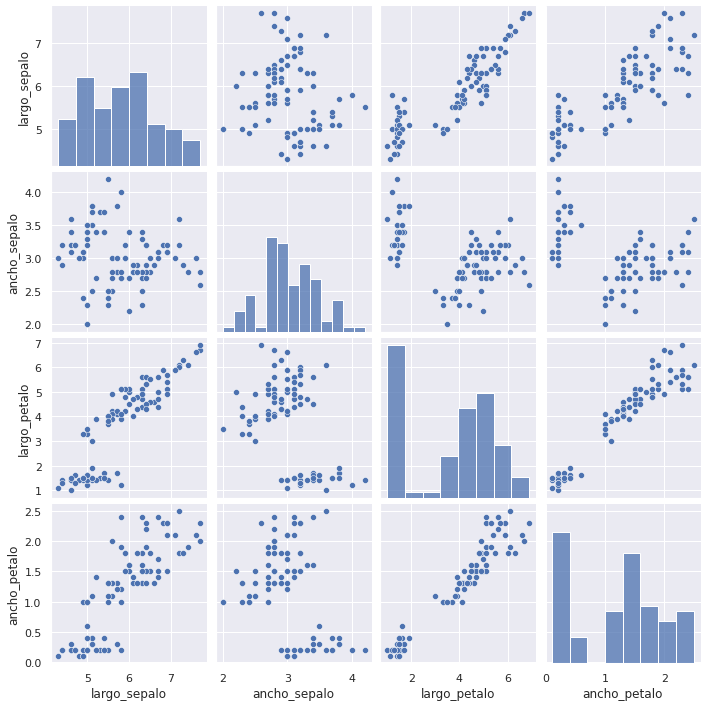

In [ ]:
%matplotlib inline
#garfico agrupado resumen dataset
sns.set()
sns.pairplot(dataset_train_X)


Algoritmo de Clasificacion por Aprendizaje Supervisado

Basado en Naive Bayes Gausiano (GBN)

In [ ]:
#importamos el modelo a usar
from sklearn.naive_bayes import GaussianNB

#Crear el modelo

model = GaussianNB() #instancia del modelo


# Entrenar el modelo
# La funcion fit entrena modelos en sklearn
# model.fit(features_train, target_train)
model.fit(dataset_train_X, dataset_train_Y)

GaussianNB()

In [ ]:
# Probar el modelo ya entrenado
inference = model.predict(dataset_test_X) #model.predict obtener datos entrenados

#comprobar la respuesta del modelo
print(inference)


['Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor']


In [ ]:
# Metricas de comprobacion (Saber si las respuestas estan bien o no)
# Metrica del rendimiento del modelo (Testing)

from sklearn.metrics import accuracy_score #puntaje de exactitud

model_accurracy = accuracy_score(dataset_test_Y, inference) #toma las respuestas correctas de nuestro modelo y luego la inferencia que es lo que el modelo predijo anteriormente
model_accurracy *= 100 #para dejarlo en modelos de porcentaje
print("La exactitud del modelo es: ", model_accurracy)
print ("El error del modelo es: ", 100-model_accurracy)


La exactitud del modelo es:  96.66666666666667
El error del modelo es:  3.3333333333333286


In [ ]:
# Hagamos una pueba con nuestros datos

dataset_validation = dataset_test_X
dataset_validation = dataset_validation[8:9]
dataset_validation["largo_sepalo"] = 5.8
dataset_validation["ancho_sepalo"] = 3.2
dataset_validation["largo_petalo"] = 5.0
dataset_validation["ancho_petalo"] = 2.0
dataset_validation

# Probar el modelo ya entrenado
inference = model.predict(dataset_validation) #model.predict obtener datos entrenados

#comprobar la respuesta del modelo
print("El modelo responde que es: ", inference)

El modelo responde que es:  ['Iris-virginica']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Algoritmo de aprendizaje no supervisado (Clustering)

Basado en Gaussian Mixture Model (GMM)

In [ ]:
#Train the other parameters using the EM algorithm
estimator.fit(X_train)

h=plt.subplot(2,n_estimators // 2,  index +1)
make_ellipses(estimator,h)

for n, color in enumerate(colors):
  data = iris.data[iris.target == n]
  plt.scatter(
      data[:,0],data[:,1], s=0.8,color =color ,label=iris.target_names[n]
  )
  #plot the test data with crosses
  for n,color in enumerate(colors):
      data = X_test[y_test == n]
      plt.scatter(data[:,0],data [:,1], marker="x",color=color)

  y_train_pred = estimator.predict(X_train)
  train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
  plt.text(0.05, 0.9,"Train accuracy: %.1f " % train_accuracy,train_accuracy,transform=h.transAxes)
  y_test_pred=estimator.predict(X_test)
  test_accuary = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
  plt.text(0.05,0.8, "Test accuary :%.1f"%test_accuracy,transform=h.transAxes)

  plt.xticks(())
  plt.yticks(())
  plt.title(name)

plt.legend(scatterpoints=1, loc = "lower right",prop=dict(size=12))

plt.show()

NameError: ignored